# LINEAR REGRESSION

In [34]:
import numpy as np
import pandas as pd

df=pd.read_csv("Desktop/fruit_dataset.csv")

In [35]:
df.head()

,Species,variable1,variable2,variable3,variable4,variable5,Weight
0,S1,?,25.4,30,11.52,4.02,242
1,S1,24,26.3,31.2,12.48,?,290
2,S1,23.9,26.5,?,12.3778,4.6961,340
3,S1,26.3,29,33.5,12.73,?,363
4,S1,26.5,29,34,12.444,5.134,430


In [36]:
df.replace('?',np.NaN, inplace = True)
#cleaning the data, replacing ? with nan

In [37]:
df.head(25)

,Species,variable1,variable2,variable3,variable4,variable5,Weight
0,S1,NaN,25.4,30,11.52,4.02,242
1,S1,24,26.3,31.2,12.48,NaN,290
2,S1,23.9,26.5,NaN,12.3778,4.6961,340
3,S1,26.3,29,33.5,12.73,NaN,363
4,S1,26.5,29,34,12.444,5.134,430
5,S1,26.8,29.7,34.7,13.6024,NaN,450
6,S1,26.8,29.7,34.5,14.1795,5.2785,500
7,S1,27.6,30,NaN,12.67,4.69,NaN
8,S1,NaN,30,35.1,NaN,4.8438,450
9,S1,28.5,30.7,36.2,14.2266,4.9594,500


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df.isna().any()

Species      False
variable1     True
variable2     True
variable3     True
variable4     True
variable5     True
Weight        True
dtype: bool

In [40]:
df.Species.values

array(['S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1',
       'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1',
       'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1', 'S1',
       'S1', 'S1', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2',
       'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2', 'S2',
       'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S4', 'S4', 'S4', 'S4', 'S4',
       'S4', 'S4', 'S4', 'S4', 'S4', 'S4', 'S5', 'S5', 'S5', 'S5', 'S5',
       'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5',
       'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5',
       'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5',
       'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5',
       'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S6', 'S6', 'S6', 'S6',
       'S6', 'S6', 'S6', 'S6', 'S6', 'S6', 'S6', 'S6', 'S6', 'S6', 'S6',
       'S6', 'S6', 'S7', 'S7', 'S7', 'S7', 'S7', 'S

In [41]:
df.variable1.values

array([nan, '24', '23.9', '26.3', '26.5', '26.8', '26.8', '27.6', nan,
       '28.5', '28.4', '28.7', '29.1', nan, '29.4', '29.4', '30.4',
       '30.4', '30.9', '31', '31.3', nan, '31.5', '31.8', '31.9', '31.8',
       '32', '32.7', '32.8', '33.5', '35', '35', '36.2', '37.4', '38',
       '12.9', '16.5', '17.5', '18.2', nan, '19', '19.1', '19.4', '20.4',
       '20.5', '20.5', '21', '21.1', '22', '22', '22.1', '23.6', '24',
       '25', '29.5', '23.6', '24.1', nan, '28.5', '33.7', '37.3', nan,
       '14.3', '16.3', '17.5', '18.4', '19', '19', '19.8', '21.2', '23',
       '24', '7.5', '12.5', '13.8', '15', '15.7', '16.2', '16.8', '17.2',
       '17.8', '18.2', '19', '19', '19', '19.3', '20', '20', '20', '20',
       nan, nan, nan, '20.7', '21', '21.5', '22', '22', '22.6', '23', nan,
       nan, '25.2', '25.4', '25.4', '25.4', '25.9', '26.9', '27.8',
       '30.5', '32', '32.5', '34', '34', '34.5', '34.6', '36.5', '36.5',
       '36.6', '36.9', '37', '37', '37.1', '39', '39.8', '40.1',

In [42]:
df['variable1'] = pd.to_numeric(df['variable1'])
df['variable2'] = pd.to_numeric(df['variable2'])
df['variable3'] = pd.to_numeric(df['variable3'])
df['variable4'] = pd.to_numeric(df['variable4'])
df['variable5'] = pd.to_numeric(df['variable5'])
df.dtypes
df["variable1"] = df.groupby("Species")['variable1'].transform(lambda x: x.fillna(x.mean()))
df["variable2"] = df.groupby("Species")['variable2'].transform(lambda x: x.fillna(x.mean()))
df["variable3"] = df.groupby("Species")['variable3'].transform(lambda x: x.fillna(x.mean()))
df["variable4"] = df.groupby("Species")['variable4'].transform(lambda x: x.fillna(x.mean()))
df["variable5"] = df.groupby("Species")['variable5'].transform(lambda x: x.fillna(x.mean()))
df['Weight'].iloc[125:126]=np.NaN
df['Weight']=pd.to_numeric(df['Weight'])
df['Weight']=df.groupby("Species")['Weight'].transform(lambda x: x.fillna(x.mean()))

C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [43]:
df

,Species,variable1,variable2,variable3,variable4,variable5,Weight
0,S1,30.612903,25.4,30.000000,11.5200,4.020000,242.0
1,S1,24.000000,26.3,31.200000,12.4800,5.517779,290.0
2,S1,23.900000,26.5,38.616667,12.3778,4.696100,340.0
3,S1,26.300000,29.0,33.500000,12.7300,5.517779,363.0
4,S1,26.500000,29.0,34.000000,12.4440,5.134000,430.0
...,...,...,...,...,...,...,...
154,S7,11.500000,12.2,13.400000,2.0904,1.393600,11.1
155,S7,11.700000,12.4,13.500000,2.1924,1.269000,13.4
156,S7,12.100000,13.0,13.800000,2.2770,1.255800,12.2
157,S7,13.200000,14.3,15.200000,2.8728,2.067200,19.7


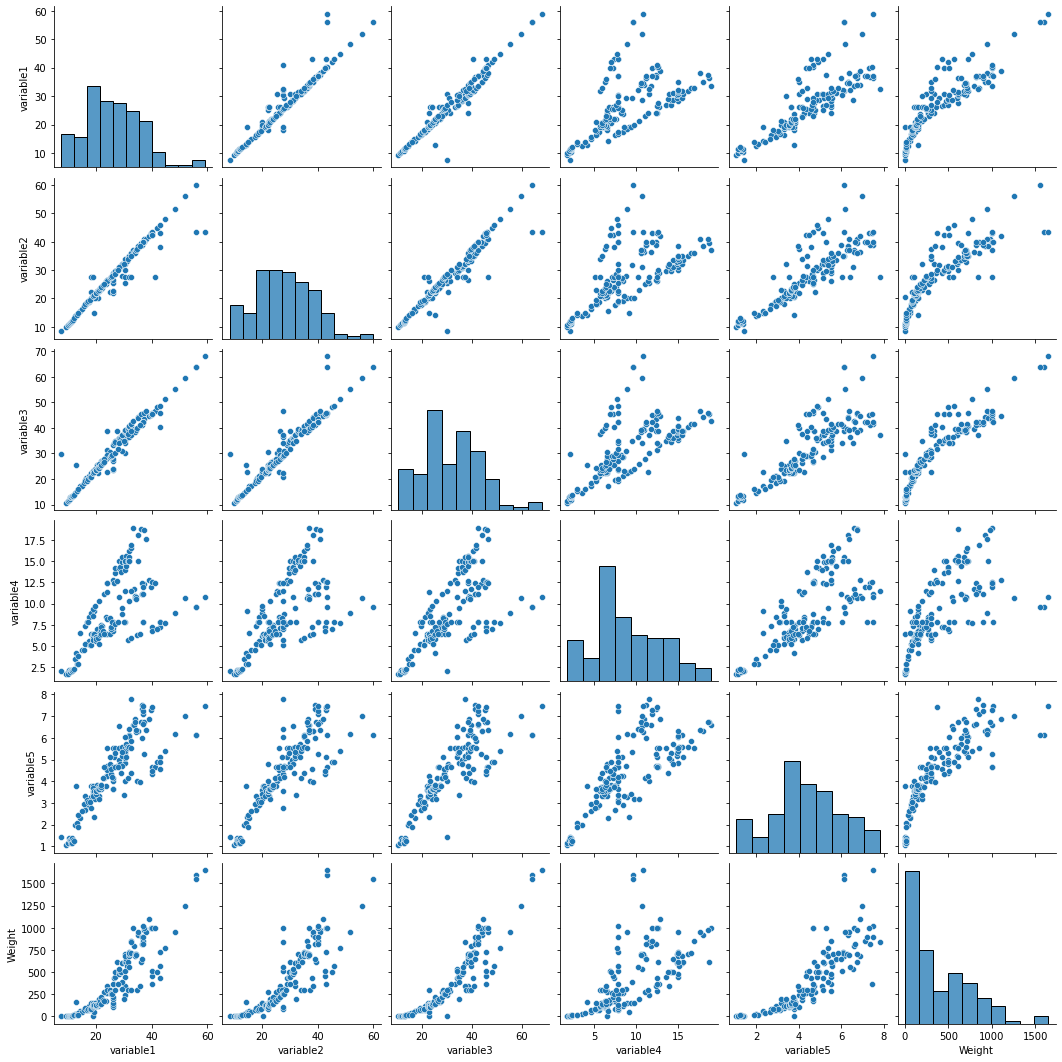

In [44]:
sns.pairplot(vars=["variable1","variable2","variable3","variable4","variable5","Weight"],data=df)

In [47]:
from sklearn.model_selection import train_test_split
predictors=["variable1","variable2","variable3","variable4","variable5"]
X = df[predictors] 
y = df['Weight'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
# Spliting the data in training and test set in 85:15 ratio
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (135, 5)
Shape of y_train: (135,)
Shape of X_test: (24, 5)
Shape of y_test: (24,)


In [127]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression
# Instantiating the algorithm for building the model
model = LinearRegression()
model.fit(X_train,y_train)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: -463.70349305784094 
Coefficients: [ 5.41638502 -0.80211402 15.62965075  7.49565659 39.22579563]


In [129]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.84886023769614, 0.8390333245648247)

# TIME SERIES ANALYSIS

In [105]:
transportation = pd.read_csv('Desktop/transportation_dataset.csv')
transportation.dtypes

Month              object
 bus ridership      int64
dtype: object

In [106]:
transportation["Month"] = pd.to_datetime(transportation['Month'])
transportation.dtypes

Month              datetime64[ns]
 bus ridership              int64
dtype: object

In [107]:
transportation.index = transportation['Month']
transportation.drop(['Month'], axis = 1, inplace = True)
transportation

,bus ridership
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630
...,...
1969-02-01,1425
1969-03-01,1419
1969-04-01,1432


In [108]:
transportation.resample('A').mean()

dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m")

transportation = pd.read_csv('Desktop/transportation_dataset.csv', index_col='Month', date_parser=dateparse)



C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


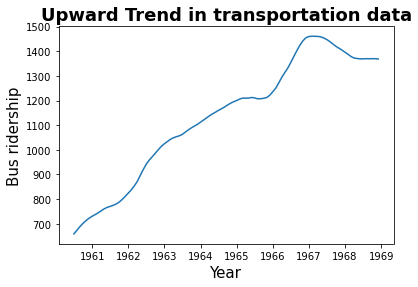

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Visualizing trend of transportation data
plt.plot(seasonal_decompose(transportation).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Bus ridership', fontsize=15)
plt.title('Upward Trend in transportation data', weight='bold', fontsize=18)
plt.show()

In [111]:
# 2.ii. Use smoothing techniques to perform trend analysis

# Exponential smoothing is calculated and rounded off to 2 decimal values
np.round(transportation.ewm(alpha=0.2,adjust=False).mean().head(),2)

# Setting frequency
transportation = pd.read_csv('Desktop/transportation_dataset.csv', index_col='Month', date_parser=dateparse)
transportation = transportation.resample('M').mean()
transportation.head()


C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,bus ridership
Month,
1960-01-31,648
1960-02-29,646
1960-03-31,639
1960-04-30,654
1960-05-31,630


In [112]:
transportation.sort_values(by=['Month'],inplace=True)
transportation

,bus ridership
Month,
1960-01-31,648
1960-02-29,646
1960-03-31,639
1960-04-30,654
1960-05-31,630
...,...
1969-02-28,1425
1969-03-31,1419
1969-04-30,1432


In [113]:
dum=transportation.resample('M').mean()
dum.head()

,bus ridership
Month,
1960-01-31,648
1960-02-29,646
1960-03-31,639
1960-04-30,654
1960-05-31,630


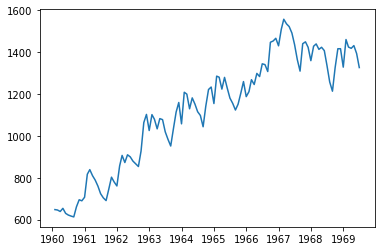

In [114]:
plt.plot(dum)

In [115]:
trans=dum.iloc[1:62]
trans.shape

(61, 1)

In [116]:
#exponential smoothing
# we are doing this step to find out what alpha value we should take 
# we will choose alpha with least MSE(Mean Squared error)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [117]:
for i in range(1, 11):
    model = SimpleExpSmoothing(trans.iloc[:60]).fit(smoothing_level=i/10, optimized=False)
#     print(model.forecast(1)[0])
    forecasted_val = np.round(model.forecast(1)[0], 2)
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val, 
          '| MSE: ', np.sqrt(np.round(mean_squared_error(np.array(trans.iloc[60]), np.array([forecasted_val])), 2)))  
# Here , alpha = 1.0 is best as its MSE is 5.0

alpha =  0.1 | Forecasted value:  1133.89 | MSE:  147.10999286248367
alpha =  0.2 | Forecasted value:  1181.54 | MSE:  99.45999195656513
alpha =  0.3 | Forecasted value:  1203.06 | MSE:  77.93997690530836
alpha =  0.4 | Forecasted value:  1218.98 | MSE:  62.019996775233714
alpha =  0.5 | Forecasted value:  1231.84 | MSE:  49.16004475181039
alpha =  0.6 | Forecasted value:  1242.7 | MSE:  38.300000000000004
alpha =  0.7 | Forecasted value:  1252.65 | MSE:  28.349955908254955
alpha =  0.8 | Forecasted value:  1262.71 | MSE:  18.289887916551045
alpha =  0.9 | Forecasted value:  1273.67 | MSE:  7.33007503372237
alpha =  1.0 | Forecasted value:  1286.0 | MSE:  5.0


C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\

In [118]:
# Now lets find the optimum alpha
import scipy as sp
# Function to find optimum value of alpha
def optimum_alpha(x):
    model = SimpleExpSmoothing(trans.iloc[0:60]).fit(smoothing_level=x, optimized = False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    mse = np.round(mean_squared_error(np.array(trans.iloc[60]), np.array([forecasted_val])), 2)
    print('alpha: ', np.round(x[0], 5), 'MSE: ', np.sqrt(mse))
    return mse
optimum_alpha_result = sp.optimize.fmin(optimum_alpha, x0=1)
if optimum_alpha_result < 0:
    optimum_alpha_result = 0.001 # Least value, you can perform further optimization to improve it
optimum_alpha_result
# alpha = 0.9609375 is the optimum alpha at which MSE came out to be 0.

aplha_val = 0.9609375

C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\

alpha:  1.0 MSE:  5.0
alpha:  1.05 MSE:  11.749893616539683
alpha:  0.95 MSE:  1.3490737563232043
alpha:  0.9 MSE:  7.33007503372237
alpha:  0.9 MSE:  7.33007503372237
alpha:  0.975 MSE:  1.7691806012954132
alpha:  0.925 MSE:  4.389760813529594
alpha:  0.9625 MSE:  0.2
alpha:  0.975 MSE:  1.7691806012954132
alpha:  0.95625 MSE:  0.5830951894845301
alpha:  0.96875 MSE:  0.9797958971132712
alpha:  0.95937 MSE:  0.2
alpha:  0.96562 MSE:  0.5916079783099616
alpha:  0.96094 MSE:  0.0
alpha:  0.95937 MSE:  0.2
alpha:  0.96172 MSE:  0.1
alpha:  0.96016 MSE:  0.1
alpha:  0.96133 MSE:  0.0
alpha:  0.96055 MSE:  0.0
alpha:  0.96113 MSE:  0.0
alpha:  0.96113 MSE:  0.0
alpha:  0.96074 MSE:  0.0
alpha:  0.96104 MSE:  0.0
alpha:  0.96104 MSE:  0.0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 24


C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


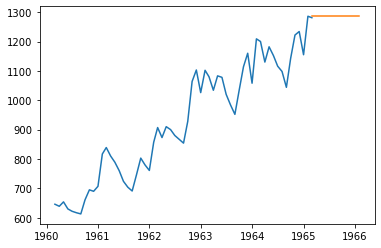

In [119]:
# Forecasting values for next year
forecasted_data=np.round(model.forecast(12)).astype(int)
forecasted_data

plt.plot(trans)
plt.plot(forecasted_data)

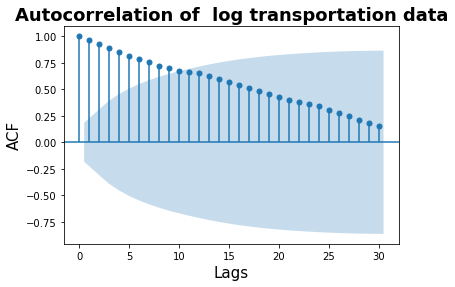

In [120]:
#Perform seasonality analysis using autocorrelation

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(np.log(transportation).T.values[0], lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of  log transportation data', fontsize=18, weight='bold')
plt.show()


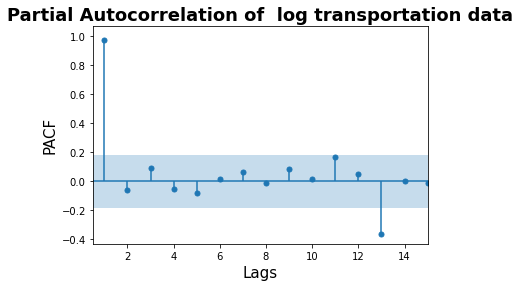

In [121]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(np.log(transportation).T.values[0], lags=15)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('PACF', fontsize=15)
plt.xlim(0.5, 15)
plt.title('Partial Autocorrelation of  log transportation data', fontsize=18, weight='bold')
plt.show()



In [122]:
# 2.iv. Test the stationarity of the data set using Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
def dffunc(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]], index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    return(dfoutput)
dffunc(np.diff(transportation.T.values[0], 1)) # Here we have used 1st order difference



Test Statistic            -1.938696
p-value                    0.314082
Critical Value at 5%      -2.890611
AIC                     1019.569293
dtype: float64

In [123]:
from statsmodels.tsa.stattools import adfuller
def dffunc(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]], index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    return(dfoutput)
dffunc(np.diff(np.log(transportation).T.values[0], 2)) # Here we have used 2nd order log


Test Statistic         -1.389512e+01
p-value                 5.870839e-26
Critical Value at 5%   -2.890611e+00
AIC                    -3.805258e+02
dtype: float64

In [124]:
# 2. v.Build ARIMA model to forecast the number of bus riders for next 2 years.

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [125]:

# Values to keep in training data, k
k = 60
# Model building
model = SARIMAX(np.log(transportation.iloc[:k]), 
                order=(10, 0, 1), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

C:\Users\Saksham\anaconda3\envs\infy\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


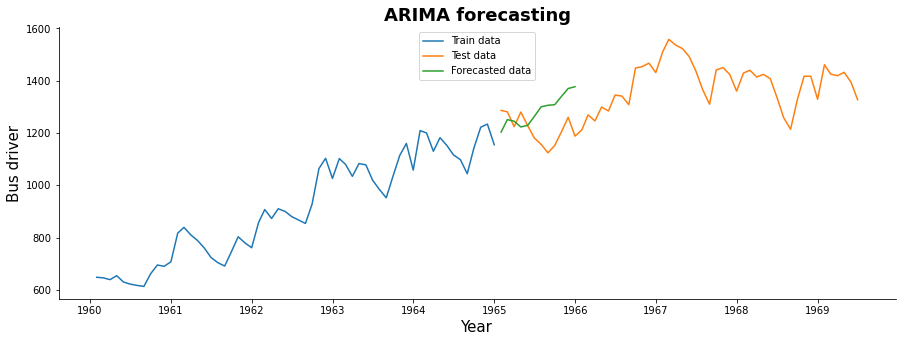

In [126]:
# Visualization
plt.figure(figsize=(15, 5))
plt.plot(transportation.iloc[:k], label='Train data')
plt.plot(transportation.iloc[k:], label='Test data')
plt.plot(np.round(np.exp(model_fit.forecast(72-k))), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Bus driver', fontsize=15)
plt.title('ARIMA forecasting', fontsize=18, weight='bold')
plt.show()

# SUPPORT VECTOR MACHINE

In [75]:
df_audio=pd.read_csv("Desktop/audio_dataset.csv")

In [76]:
df_audio.head(25)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [77]:
df_audio.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [78]:
df_audio["label"]=[1 if i=='male'else 0 for i in df_audio["label"]]

<AxesSubplot:>

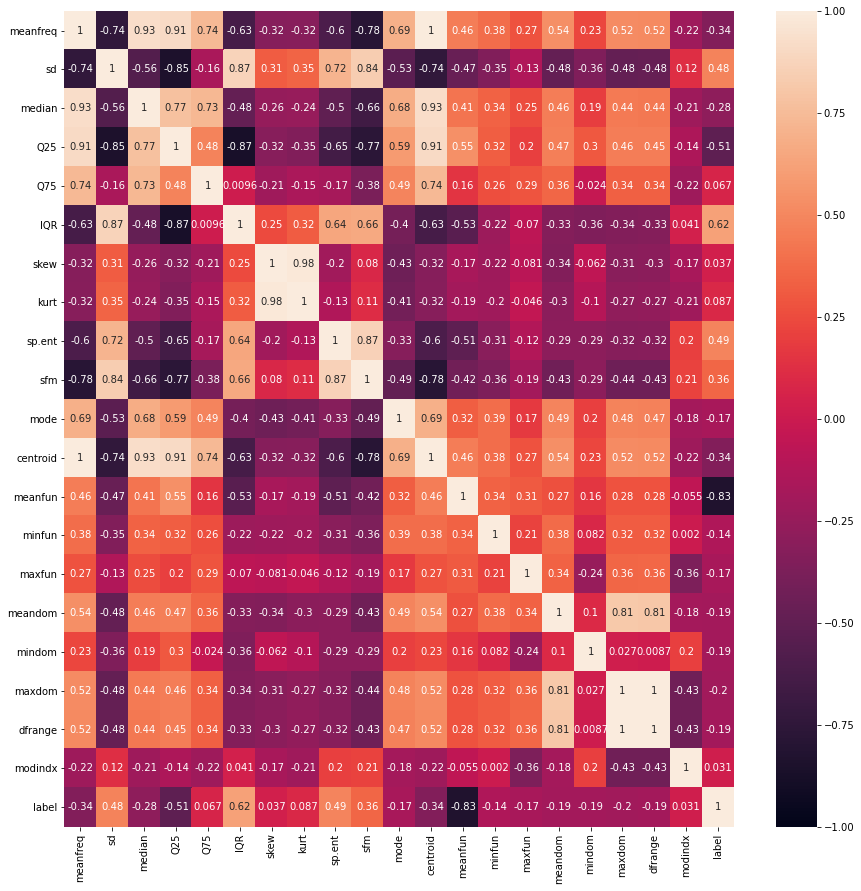

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(df_audio.corr(),vmin=-1,vmax=1,annot=True)

In [80]:
predictors=['Q25','Q75','median','sd','sp.ent']
X=df_audio[predictors]
y=df_audio['label']

In [81]:
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split(X, y, test_size=0.10, random_state=100)
# Spliting the data in training and test set in 90:10 ratio
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (135, 5)
Shape of y_train: (135,)
Shape of X_test: (24, 5)
Shape of y_test: (24,)


In [82]:
from sklearn.svm import SVC

In [83]:
model=SVC()
model.fit(X_audio_train,y_audio_train)

SVC()

In [84]:
model.score(X_audio_train,y_audio_train),model.score(X_audio_test,y_audio_test)

(0.8891616976499473, 0.9116719242902208)

In [85]:
from sklearn.metrics import confusion_matrix
predictions1=model.predict(X_audio_train)
predictions2=model.predict(X_audio_test)

In [86]:
train_conf_matrix=confusion_matrix(y_audio_train,predictions1)
test_conf_matrix=confusion_matrix(y_audio_test,predictions2)

In [87]:
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)
#1 is male and 0 is female 

,0,1
0,1139,281
1,35,1396


In [88]:
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)

,0,1
0,143,21
1,7,146


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_audio_test,predictions2))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       164
           1       0.87      0.95      0.91       153

    accuracy                           0.91       317
   macro avg       0.91      0.91      0.91       317
weighted avg       0.92      0.91      0.91       317

